In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import os
import matplotlib.pyplot as plt

In [2]:
#unzipdata

#path_to_zip_file = '/content/drive/MyDrive/dataset/dogs-vs-cats/train.zip'



#directory_to_extract_to = '/content/drive/MyDrive/dataset/dogs-vs-cats'

#import zipfile
#with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#    zip_ref.extractall(directory_to_extract_to)



In [3]:
#path_to_zip_file2 = '/content/drive/MyDrive/dataset/dogs-vs-cats/test1.zip'
#with zipfile.ZipFile(path_to_zip_file2, 'r') as zip_ref:
 #   zip_ref.extractall(directory_to_extract_to)

In [5]:
filenames = os.listdir('/content/drive/MyDrive/dataset/dogs-vs-cats/train')

categories = []

for name in filenames:
  category = name.split('.')[0]
  if category == "dog":
    categories.append(1)
  else:
    categories.append(0)

image_df = pd.DataFrame({'filename':filenames, 'category':categories})

In [6]:
image_df.tail()

,filename,category
24995,cat.10893.jpg,0
24996,cat.10894.jpg,0
24997,cat.10895.jpg,0
24998,cat.10896.jpg,0
24999,cat.10897.jpg,0


In [7]:
image_df.shape

(25000, 2)

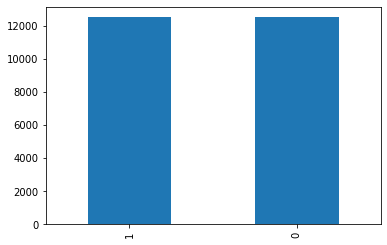

In [8]:
image_df['category'].value_counts().plot.bar()

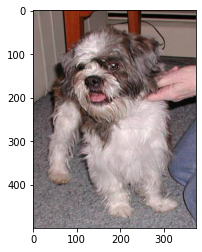

In [9]:
import random
sample = random.choice(filenames)

image= load_img('/content/drive/MyDrive/dataset/dogs-vs-cats/train/'+sample)
plt.imshow(image)

In [10]:
image_df.head()

,filename,category
0,dog.9099.jpg,1
1,dog.91.jpg,1
2,dog.910.jpg,1
3,dog.9100.jpg,1
4,dog.9101.jpg,1


In [11]:
#Replacing category value 1 -> dog; 0 -> cat

image_df["category"] = image_df["category"].replace({0: 'cat', 1: 'dog'})

In [12]:
image_df.tail()

,filename,category
24995,cat.10893.jpg,cat
24996,cat.10894.jpg,cat
24997,cat.10895.jpg,cat
24998,cat.10896.jpg,cat
24999,cat.10897.jpg,cat


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_df, validation_df = train_test_split(image_df, test_size = 0.2, random_state = 10)

In [15]:
train_df = train_df.reset_index(drop=True)

validation_df = validation_df.reset_index(drop=True) 

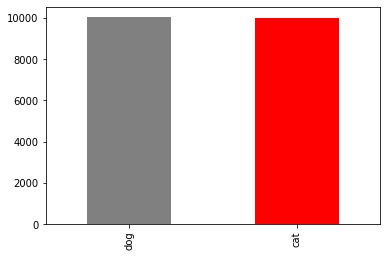

In [16]:
train_df['category'].value_counts().plot.bar(color=['grey', 'red'])

In [17]:
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size= 15

In [18]:
validation_df.shape[0]


5000

In [19]:
train_df_size = train_df.shape[0]
validation_df_size = validation_df.shape[0]

In [20]:
#image datagenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(train_df,directory='/content/drive/MyDrive/dataset/dogs-vs-cats/train',
                                                    x_col = 'filename', y_col ='category', target_size=IMAGE_SIZE,
                                                    class_mode ='categorical',
                                                    batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [21]:
#validation data generator

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator =  validation_datagen.flow_from_dataframe(validation_df,directory='/content/drive/MyDrive/dataset/dogs-vs-cats/train',
                                                    x_col = 'filename', y_col ='category', target_size=IMAGE_SIZE,
                                                    class_mode ='categorical',
                                                    batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


In [22]:
imd_image = train_df.sample(n=1)
imd_image

,filename,category
15175,cat.9349.jpg,cat


In [23]:
#Image datagenarated images

#imd_image = train_df[0]

imd_generator = train_datagen.flow_from_dataframe(imd_image,directory='/content/drive/MyDrive/dataset/dogs-vs-cats/train',
                                                    x_col = 'filename', y_col ='category', target_size=IMAGE_SIZE,
                                                    class_mode ='categorical',
                                                    batch_size=batch_size)

Found 1 validated image filenames belonging to 1 classes.


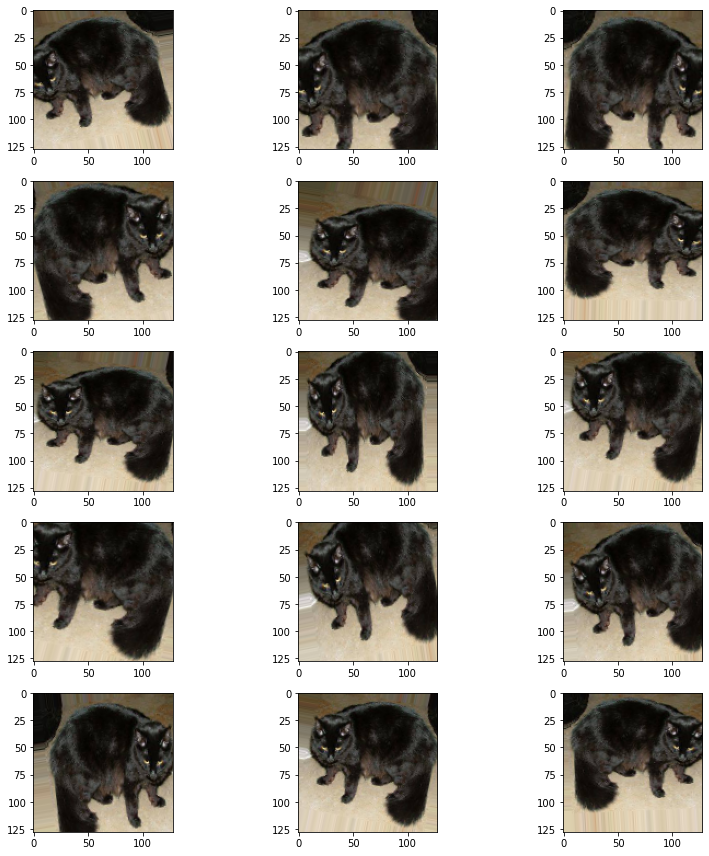

In [24]:


# visualize generated images from one image
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in imd_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()



In [25]:
#Model Building

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [26]:
model= Sequential()

#Convlution layer -1 

model.add(Conv2D(32,(3,3), activation='relu',input_shape = (IMAGE_WIDTH,IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Convlution layer -2 

model.add(Conv2D(64,(3,3), activation='relu',input_shape = (IMAGE_WIDTH,IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Convlution layer -3 
model.add(Conv2D(128,(3,3), activation='relu',input_shape = (IMAGE_WIDTH,IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#flatten layer

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Output layer
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [27]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [28]:
# EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 7,
                          verbose = 1,
                          restore_best_weights = True)

# ModelCheckPoint
checkPoint = ModelCheckpoint(filepath="/content/drive/MyDrive/dataset/dogs-vs-cats/cd_model.h5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

# ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [29]:
callbacks = [earlystop , checkPoint, learning_rate_reduction]

In [30]:
from datetime import datetime

def timer(start_time= None):
  if not start_time:
    start_time=datetime.now()
    return start_time
  elif start_time:
    thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
    tmin,tsec=divmod(temp_sec,60)
    print('\n Time taken: %i hours %i minutes and %s seconds. '% (thour,tmin,round(tsec,2)))

In [31]:
#Model Fitting

start_time = timer(None)
epochs=3 if FAST_RUN else 40   
classifier = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_df_size//batch_size,
    steps_per_epoch=train_df_size//batch_size,
    callbacks=callbacks
)
timer(start_time)

Epoch 1/40
1333/1333 [==============================] - 7232s 5s/step - loss: 0.8904 - accuracy: 0.6004 - val_loss: 0.8277 - val_accuracy: 0.6002

Epoch 00001: val_loss improved from inf to 0.82774, saving model to /content/drive/MyDrive/dataset/dogs-vs-cats/cd_model.h5
Epoch 2/40
1333/1333 [==============================] - 164s 123ms/step - loss: 0.6266 - accuracy: 0.6614 - val_loss: 0.5393 - val_accuracy: 0.7221

Epoch 00002: val_loss improved from 0.82774 to 0.53930, saving model to /content/drive/MyDrive/dataset/dogs-vs-cats/cd_model.h5
Epoch 3/40
1333/1333 [==============================] - 162s 121ms/step - loss: 0.5861 - accuracy: 0.6942 - val_loss: 0.4939 - val_accuracy: 0.7732

Epoch 00003: val_loss improved from 0.53930 to 0.49388, saving model to /content/drive/MyDrive/dataset/dogs-vs-cats/cd_model.h5
Epoch 4/40
1333/1333 [==============================] - 160s 120ms/step - loss: 0.5224 - accuracy: 0.7415 - val_loss: 0.6205 - val_accuracy: 0.7309

Epoch 00004: val_loss did 

In [32]:
model.save("/content/drive/MyDrive/dataset/dogs-vs-cats/saved_cat_dog_classifierr.h5")

In [33]:
#Save the model

from keras.models import load_model
new_model = load_model('/content/drive/MyDrive/dataset/dogs-vs-cats/cd_model.h5')

In [34]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

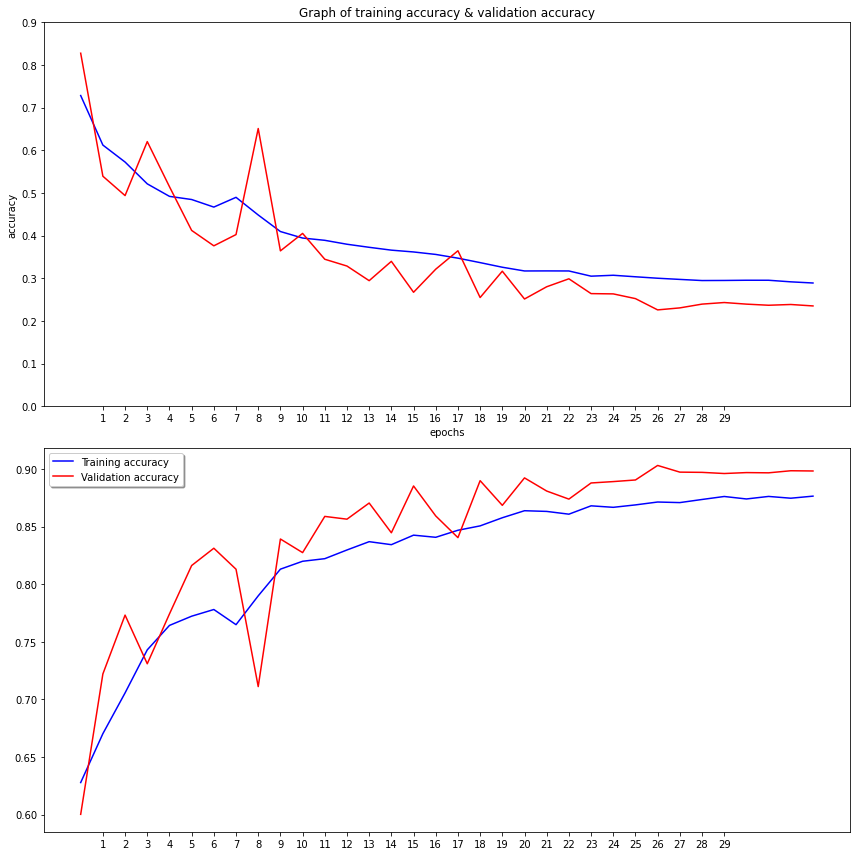

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# plot graph of training loss & validation loss
ax1.plot(classifier.history['loss'], color='b', label="Training loss")
ax1.plot(classifier.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 30, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.set_title("Graph of training loss & validation loss")

# plot graph of training accuracy & validation accuracy
ax2.plot(classifier.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(classifier.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 30, 1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("accuracy")
ax1.set_title("Graph of training accuracy & validation accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()